<a href="https://colab.research.google.com/github/AiSamdasu/Study_DDB/blob/main/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 사이킷런(scikit-learn)
- 머신러닝 라이브러리(파이썬 ML 라이브러리)
- 가장 많이씀

# 2. 붓꽃 품종 예측하기


### 지도학습
- 분류, 회귀 : 대표적인 지도학습
- 학습을 위한 다양한 피처와 분류 결정값인 레이블(Label)데이터로 모델을 학습한 뒤,별도의 테스트 데이터 세트에서 미지의 레이블을 예측
- 명확한 정답이 주어진 데이터를 먼저 학습 -> 미지의 정답을 예측하는 방식
---
학습 데이터 세트 : 학습을 위해 주어진 데이터 세트
테스트 데이터 세트 : 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트

### 레이블 데이터 세트의 개념
- 데이터 샘플(입력 데이터, feature)과 정답(출력 데이터, label)이 함께 존재하는 데이터 세트.
- 지도학습(Supervised Learning)에 사용됨.<br><br>
---
- 데이터 분석에서 **레이블 데이터 세트(labeled dataset)**란, 각 데이터 포인트에 대해 **정답(레이블, label)**이 명확하게 주어진 데이터 세트를 의미

### 사이킷 런 사용
- 사이킷런 패키지내의 모듈명 : sklearn


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리
# 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈 모임
#         하이퍼 파라미터 : 최적의 학습을 위해 직접 입력하는 파라미터
from sklearn.tree import DecisionTreeClassifier
# 트리 기반 ML알고리즘을 구현한 클래스의 모임
from sklearn.datasets import load_iris
# 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임

In [2]:
iris = load_iris()
# iris.data -> Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 보유
iris_data = iris.data
# 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 보유
iris_label = iris.target

# DF로 변경
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### 학습용 데이터와 테스트용 데이터로 분리 -> train_test_split() API 사용  
 train_test_split(
  <br>&nbsp;&nbsp;&nbsp;&nbsp;(1: 피처 데이터 세트),
  <br>&nbsp;&nbsp;&nbsp;&nbsp;(2: 레이블(Label) 데이터 세트),
  <br>&nbsp;&nbsp;&nbsp;&nbsp;(3: test_size == 테스트 데이터 세트의 비율, 20%),
  <br>&nbsp;&nbsp;&nbsp;&nbsp;(4: random_state == 수행할때 동일한 학습/테스트 용 데이터 세트를 생성, seed값 )
  <br>)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)
# X_train -> 학습용 피처 데이터 세트
# X_test -> 테스트용 피처 데이터 세트
# y_train -> 학습용 레이블 데이터 세트
# y_test -> 테스트용 레이블 데이터 세트

### 머신러닝 분류 알고리즘의 하나인, 의사 결정 트리 사용
- DecisionTreeClassifier 를 객체로 사용
---
### DecisionTreeClassifier
- 결정 트리(Decision Tree) 알고리즘을 사용하여 분류(Classification)를 수행하는 모델
- 데이터의 특징(feature)에 따라 조건문(if-else) 형태의 트리 구조를 형성하여 학습
- 특정 기준(예: 지니 지수, 엔트로피 등)을 사용하여 데이터를 여러 그룹으로 나누어 최적의 분류를 수행.

In [4]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

# 학습이 완료된 DecisionTreeClassifier객체에서 테스트 데이터로 예측 수행
pred = dt_clf.predict(X_test)

# 사이킷런에서 제공하는 score 확인 함수
from sklearn.metrics import accuracy_score
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9333



현재까지 붓꽃 데이터 세트로 분류를 예측한 프로세스
1. 데이터 세트 분리 : 학습 데이터와 테스트 데이터로 분리
2. 모델 학습 : 학습 데이터로 ML모델 학습
3. 예측 수행 : 학습된 ML모델로 테스트 데이터로 예측
4. 평가 : score
---

---
## fit(), predict() 메서드
- fit() : ML모델 학습
- predict() : 학습된 모델 예측
---
## Estimator : 지도학습의 모든 알고리즘을 구현한 클래스 통칭
Estimator -> Classifier + Regressor
- Classifier : 분류 알고리즘을 구현한 클래스
- Regressor : 회귀 알고리즘을 구현한 클래스
---

# 3. 사이킷런 주요 모듈 정리

| 분류 | 모듈명 | 설명 |
|------|-------|------|
| 예제 데이터 | `sklearn.datasets` | 사이킷런에서 제공하는 다양한 예제 데이터 셋 |
| 피처 처리 | `sklearn.feature_extraction` | 텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출하는 기능 제공 |
| |`sklearn.preprocessing` |데이터 전처리에 필요한 다양한 가공 기능(문자열을 숫자형 코드값으로 인코딩, 정규화, 스케일링 등) |
| |`sklearn.feature_selection`| 알고리즘에 큰 영향을 미치는 피처를 우선순위대로 셀렉션 작업을 수행하는 다양한 기능 제공|
| 피처 처리 & 차원 축소 | `sklearn.decomposition` | 차원 축소와 관련된 알고리즘 제공 (PCA, NMF 등) |
| 데이터 분리, 검증 & 파라미터 튜닝 | `sklearn.model_selection` | 교차 검증을 위한 학습/테스트용 데이터 분리, Grid Search를 통한 최적 파라미터 추출 기능 제공 |
| 평가 | `sklearn.metrics` | 분류, 회귀, 클러스터링, 피어와이즈(Pariwise) 성능 측정 방법 제공 |
| ML 알고리즘 | `sklearn.ensemble` | 앙상블 알고리즘 제공 (랜덤 포레스트, 에이다 부스트 등) |
|  | `sklearn.linear_model` | 회귀 관련 알고리즘 제공 (릿지, 라쏘, SGD 등) |
|  | `sklearn.naive_bayes` | 나이브 베이즈 알고리즘 제공 (가우시안 NB, 다항 분포 NB 등) |
|  | `sklearn.neighbors` | 최근접 이웃 알고리즘 제공 (K-NN 등) |
|  | `sklearn.svm` | 서포트 벡터 머신 알고리즘 제공 |
|  | `sklearn.tree` | 의사 결정 트리 알고리즘 제공 |
|  | `sklearn.cluster` | 비지도 클러스터링 알고리즘 제공 (K-평균, 계층형, DBSCAN 등) |
| 유틸리티 | `sklearn.preprocessing` | 피처 스케일링 및 전처리 기능 제공 |
|  | `sklearn.pipeline` | 피처 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 함께 묶어서 실행할 수 있는 유틸리티 제공 |


# 4. Model Selection 모듈 소개
Model Selection 모듈 : 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가, Estimator의 하이퍼 파라미터를 튜닝 하기 위한 다양한 함수와 클래스 제공

### train_test_split()
- 학습데이터와 예측데이터가 동일 -> 정확도 100% 문제 발생
- 따라서 분리
---
train_test_split( (피처 데이터 세트), (레이블 데이터 세트), (선택적 파라미터 입력))

In [5]:
# test_size : 전체 데이터에서 테스트 데이터 세트의 크기를 얼마나 할지 정함, 디폴트 0.25(25%)
# shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지 정함, 디폴트 True
# random_state : 호출할때 동일할 학습/테스트용 데이터 세트를 생성하깅 위한 난수 값
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = load_iris()
dt_clf = DecisionTreeClassifier()
# 테스트 데이터 세트를 전체 30%로 설정
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=121)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9556


## 교차 검증
- 과적합 문제 해결
  - 과적합 :
    -  모델이 학습데이터에만 과도하게 최적화 되어 있는것
    - 실제 예측을 다른 데이터로 수행할 경우 예측 성능이 과도하게 떨어짐

- 학습 데이터 세트 -> 학습 데이터 세트 + 검증 데이터 세트로 나눔
- 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것
---


### K폴드 교차 검증
- K개의 데이터 폴드 세트를 만들어 K번만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행하는 방법


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 kFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기 : ', features.shape[0])


붓꽃 데이터 세트 크기 :  150


In [7]:
n_iter = 0
# kFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를  array로 반환
for train_index, test_index in kfold.split(features):
    # kfold.split()으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도 : ', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 : 0.8667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 : 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 : 0.7333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도 :  0.9


### Stratified K폴드
- 불균형한(imbalanced) 분포도를 가진 레이블 데이터 집합을 위한 K폴드 방식
- 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것을 말한다

ex) 대출 사기 데이터 -> 전체의 0.0001%로 사기 -> 중요한 데이터지만 원본 데이터와 차이 -> 원본 데이터와 유사하게 학습/테스트 해야함


In [8]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

,count
label,
0,50
1,50
2,50


레이블 값이 모두 50개로 동일
-> Setosa 품종, Versicolor 품종, Virginica 품종 모두 50개

---
이슈 발생하는 현상을 도출하기 위해 3개의 폴드 세트를 Kfold로 생성, 교차 검증시 생성되는 학습/ 검증 레이블 데이터 값의 분포도 확인

In [9]:
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 : \n', label_train.value_counts())
    print('검증 레이블 데이터 분포 : \n', label_test.value_counts())

## 교차 검증 : 1
학습 레이블 데이터 분포 : 
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포 : 
 label
0    50
Name: count, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포 : 
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포 : 
 label
1    50
Name: count, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포 : 
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포 : 
 label
2    50
Name: count, dtype: int64


교차 검증 시마다 3개의 폴드 세트로 만들어지는 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출

---
ex)
첫번째 교차 검증시 :
- 학습 레이블은 1,2 밖에 없음 -> 0의 경우는 전혀 학습하지 못함
- 검증 레이블은 0밖에 없음 -> 학습 모델은 절대 0을 예측하지 못함
- 위 방식으로 분할시 검증 예측 정확도는 항상 0

---

-> 위 문제를 StratifiedKFold로 해결

StratifiedKFold 사용 -> KFold와 비슷
- split() 메서드에 인자로 피처 데이터세트와 레이블 데이터 세트 2개가 필요

In [10]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 : \n', label_train.value_counts())
    print('검증 레이블 데이터 분포 : \n', label_test.value_counts())

## 교차 검증 : 1
학습 레이블 데이터 분포 : 
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포 : 
 label
0    17
1    17
2    16
Name: count, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포 : 
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포 : 
 label
0    17
2    17
1    16
Name: count, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포 : 
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포 : 
 label
1    17
2    17
0    16
Name: count, dtype: int64


학습 레이블과 검증 레이블 데이터 값의 분포도가 거의 동일하게 할당됨

In [11]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    # split()으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도 : ', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도 : ', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 : 0.94, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도 :  [0.98 0.94 0.98]
## 평균 검증 정확도 :  0.9666666666666667


과정
1. 폴드 세트를 설정
2. for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스 추출
3. 반복적으로 학습과 예측을 수행하고 예측 성능을 반환

---
Stratified K 폴드 -> 일반적으로 분류에서 교차검증에서 사용
- 분류는 이산값 형태의 레이블
- 회귀(Regression)에서는 지원되지 않음
  - 회귀의 결정값은 연속된 숫자값이기 때문에 결정값별로 분포를 정하는 의미가 없음

### cross_val_score()
- 위 과정을 한번에 수행해주는 API

- 선언

---
cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')

<br>
return array

---
<br>estimator, X, y, scoring, cv 가 주요 파라미터 <br>
<br>estimator : 분류 알고리즘(Classifier), 회귀 알고리즘(Regressor)
<br>x : 피처 데이터 세트
<br>Y : 레이블 데이터 세트
<br>scoring : 예측 성능 평가 지표를 기술
<br>cv : 교차 검증 폴드 수


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris.data
label = iris.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도 : ', np.round(scores, 4))
print('평균 검증 정확도 : ', np.round(np.mean(scores), 4))

교차 검증별 정확도 :  [0.98 0.94 0.98]
평균 검증 정확도 :  0.9667


cross_val_score() <br>-> cv로 지정된 횟수만큼 scoring 파라미터로 지정된 평가 지표로 평가 결과값을 array로 return <br>

---

내부적으로 StratifiedKFold 사용

---

### GridSearchCV
- 교차검증과 최적 하이퍼 파라미터 튜닝을 한번에 처리
- Grid -> 격자, 촘촘하게 파라미터를 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방앙 제공


In [13]:
grid_parameters = {
    'max_depth' : [1,2,3],
    'min_samples_split' : [2,3]
}
# 6번 검증

GridSearchCV 클래스의 생성자 인자<br>
<br>estimator : classifier, regressor, pipeline 이 사용될수있음
<br>param_grid : key + 리스트 값을 가지는 딕셔너리가 주어짐,
<br>scoring : 예측 성능을 측정할 평가 방법을 지정, 주로 accuracy -> 정확도
<br>cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정
<br>refit : 디폴트가 True, True-> 가장 최적의 하이퍼 파라미터를 찾은 뒤, 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습 시킴

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
x_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth' : [1,2,3], 'min_samples_split' : [2,3]}

In [15]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(x_train, y_train)
# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


- 총 6개의 결과
- 하이퍼 파라미터 max_depth와 min_samples_split을 순차적으로 총 6번 병경하면서 학습 및 평가를 수행했음을 의미
- 'params' 칼럼에는 수행할 때마다 적용된 하이퍼 파라미터 값을 가지고 있음
- 인덱스 4번을 보면, 'rand_test_score'칼럼 값이 1 이다.
  - 해당 하이퍼 파라미터의 조합인 {'max_depth': 3, 'min_samples_split': 2} 으로 평가한 결과 예측 성능이 1위임을 의미

- mean_test_score는 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값임

In [16]:
print('GridSearchCV 최적 파라미터 : ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터 :  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9750


In [17]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV 의 best_estimator_는 이미 최적 학습이 되었음. 별도 학습 필요 X
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도 : 0.9667


일반적으로 학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법

---

# 5. 데이터 전처리
- 어떤 데이터를 입력으로 가지는지에 따라 결과가 달라짐
- 사이킷런의 ML알고리즘을 적용하기 전에 데이터에 대해 미리 처리

---

-> 처리 할것
1. 결손값
  - NaN, Null값은 허용되지 않음 -> Null값은 고정된 다른 값으로 변경
  1. Null값이 얼마 되지 않는 경우 -> 피처의 평균값 등으로 간단히 대체
  2. Null값이 대부분 -> 해당 피처는 drop하는 것이 좋음
  3. Null값이 일정 수준 이상 되는 경우 -> 결정 힘들다.
    - 중요도 등에 따라 정밀한 대체 값 선정 필요
  
2. 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용 X
  - 모든 문자열 값은 인코딩 -> 숫자 형으로 변환
  - 문자열 피처는 일반적으로 카테고리형 피처(코드값)와 텍스트형 피처를 의미
  - 텍스트형 피처는 불필요하면 삭제하는 것이 좋음
    - ex) 주민번호, 단순 문자열 아이디 등
    

---

## 데이터 인코딩
- 레이블 인코딩
- 원-핫 인코딩(One Hot encoding)

---

### 레이블 인코딩
- 카테고리 피처를 코드형 숫자 값으로 변환 하는 것

ex) 상품 데이터의 상품 구분이 Tv, 냉장고, 전자레인지, 컴퓨터, 선풍기, 믹서 값이면
<br> TV : 1
<br> 냉장고 : 2
<br> 전자레인지 : 3
<br> 컴퓨터 : 4
<br> 선풍기 : 5
<br> 믹서 : 6

- 주의 : '01', '02'와 같은 코드값 역시 문자열 -> 1, 2와 같은 숫자형 값으로 변환되어야 함

---

- LabelEncoder 클래스로 구현
  - 객체 생성후 -> fir() 과 transform() 을 호출해 레이블 인코딩 수행

In [18]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값 : ', labels)
print('인코딩 클래스: ', encoder.classes_)
print('디코딩 원본값 : ', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

인코딩 변환값 :  [0 1 4 5 3 3 2 2]
인코딩 클래스:  ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본값 :  ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


- 간단하게 문자열값 -> 숫자형 카테고리 값으로 변환
- 일부 알고리즘은 예측 성능이 떨어질 수 있음
  - ex) 냉장고가 1, 믹서가 2일 경우 1<2 이므로 믹서를 더 중요하게 인식할 가능성이 있음
- 따라서 선형회귀와 같은 ML알고리즘에서는 적용 X
- 트리 계열의 ML알고리즘은 숫자의 특성을 반영하지 않으므로 사용 O

---

### 원-핫 인코딩(One-Hot Encoding)
- 레이블 인코딩의 문제점을 해결하기 위한 방식
- 행 형태 -> 열 형태로 변환, 고유값에 해당하는 칼럼에 1, 나머지를 0 표시

---

- OneHotEncoder 클래스로 변환
- 입력값으로 2차원 데이터가 필요
- 변환한 값이 희소 행렬(Sparse Matrix)이므로 -> toarray()메서드를 이용해 밀집행렬(Dense Matrix)로 변환 해야함

In [19]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 2차원 ndarray로 변환
items = np.array(items).reshape(-1,1)

# 원-핫 인코딩을 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


- 판다스 api 이용 -> 더 쉽게 원-핫 인코딩 사용
- get_dummies() -> 사이킷런과 다르게 문자열 카테고리 값을 숫자형으로 변환할 필요없음, 바로 문자열 전달

In [20]:
import pandas as pd

df = pd.DataFrame({'item' : ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


## 피처 스케일링과 정규화

- 대표적인 방법
  - 표준화(Standardization)
  - 정규화(Normalization)
    - 일반적으로 정규화는 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해 주는 개념

Min-Max Normalization (최소-최대 정규화)
$$ x_{i_{new}} = \frac{x_i - \min(x)}{\max(x) - \min(x)} $$


Vector Normalization (벡터 정규화) -> 사이킷런에서 사용

$$ x_{i_{new}} = \frac{x_i}{\sqrt{x_i^2 + y_i^2 + z_i^2}} $$


Z-score Normalization (Z-점수 표준화)

$$ x_{i_{new}} = \frac{x_i - \text{mean}(x)}{\text{stdev}(x)} $$


일반적인 의미의 표준화와 정규화 -> 피처 스케일링
<br> 선형대수 개념의 정규화를 벡터 정규화로 지칭

## 피처 스케일링 클래스
- StandardScaler
- MinMaxScaler

### StandardScaler
- 표준화를 쉽게 지원하는 클래스
- 개별 피처를 평균이 0이고, 분산이 1인 가우시안 정규 분포를 가지도록 변환
  - 사이킷런에서 서포트 벡터 머신, 선형 회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가정하고 구현됨



In [21]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(df.mean())
print('\nfeature들의 분산 값')
print(df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


StandardScaler -> 각 피처를 한번에 표준화해 변환

In [22]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환, fit()과 transform() 호출
scaler.fit(iris_data)
iris_scaled = scaler.transform(iris_data)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


모든 칼럼 값의 평균이 0에 아주 가까운 값, 분산은 1에 매우 가까운값

---

### MinMaxScaler
- 데이터 값을 0과 1 사이의 범위 값으로 변환
  - 음수 값이 있으면 -1과 1 사이의 값으로 변환

- 데이터 분포가 가우시안 분포가 아닐 경우 Min, Max Scale을 적용해 볼 수 있음


In [23]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환, fit()과 transform() 호출
scaler.fit(iris_data)
iris_scaled = scaler.transform(iris_data)

# transform() 시 스케일 변환된 데이터 세트가 Numpy, ndarray로 return, 이를 DataFrame 으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


모든 피처에 0에서 1 사이의 값으로 변환되는 스케일링이 적용됨.

---


## 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
Scaler 객체 사용시 fit(), transform(), fit_transform() 메서드 이용 <br>
1. fit()
  - 데이터 변환을 위한 기준 정보 설정 적용
  - ex) 데이터 세트의 최댓값/최솟값 설정 등
2. transform()
  - 설정된 정보를 이용해 데이터를 변환
3. fit_transform()
  - fit() 과 transform()을 한번에 적용하는 기능 수행

---

주의<br>
Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면<br> 테스트 데이터 세트로는 다시 fit()을 수행하지 않고, 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야함<br>
<br> 즉 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 만들게 되면 <br>
학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라짐 -> 올바른 예측 결과를 도출하지 못할수 있음

In [24]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경

train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

# 1/10 scale 로 train_array 데이터 변환함. 원본 10 -> 1로 변환됨
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터 : ', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터 : ', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터 :  [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


학습 데이터 변환 완료

In [25]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5 -> 1로 변환
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력
print('원본 test_array 데이터 : ', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터 : ', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터 :  [0 1 2 3 4 5]
Scale된 test_array 데이터 :  [0.  0.2 0.4 0.6 0.8 1. ]


테스트 데이터 세트 변환 완료 <br>

위 결과 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음
<br> -> 서로 다른 원본값이 동일한 값으로 변환됨

In [26]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터 : ', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터 : ', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야함
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터 : ', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터 : ', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터 :  [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터 :  [0 1 2 3 4 5]
Scale된 test_array 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5]


학습 데이터, 테스트 데이터 모두 1/10 수준으로 동일하게 변환됨

---

fit_transform()을 적용할때도 비슷
<br> 학습 데이터는 상관없으나 테스트 데이터는 절대 사용하면 안됨
<br> -> 전체 데이터 세트에 스케일링을 적용 -> 학습데이터, 테스트 데이터로 분류

---

# 06. 사이킷런으로 수행하는 타이타닉 생존자 예측



In [30]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

base_path = r'/content/drive/MyDrive/DB동아리/dataset'

file_name = r'titanic.csv'

file_path = os.path.join(base_path,file_name)
df = pd.read_csv(file_path)

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
print('\n ### 학습 데이터 정보 ### \n')
print(df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [32]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('N', inplace=True)
df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 갯수 ', df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


<ipython-input-32-da3e0976c5dd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-32-da3e0976c5dd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [33]:
print(' Sex 값 분포 :\n', df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', df['Embarked'].value_counts())

 Sex 값 분포 :
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포 :
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포 :
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [35]:
df['Cabin'] = df['Cabin'].str[:1]
print(df['Cabin'].head(3))
df.groupby(['Sex', 'Survived'])['Survived'].count()

0    N
1    C
2    N
Name: Cabin, dtype: object


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

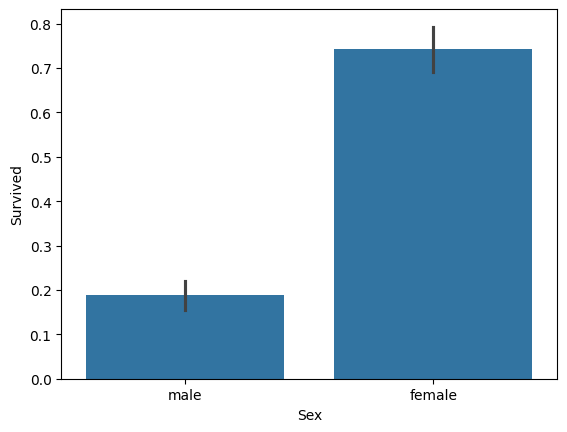

In [36]:
sns.barplot(x='Sex', y='Survived', data=df)

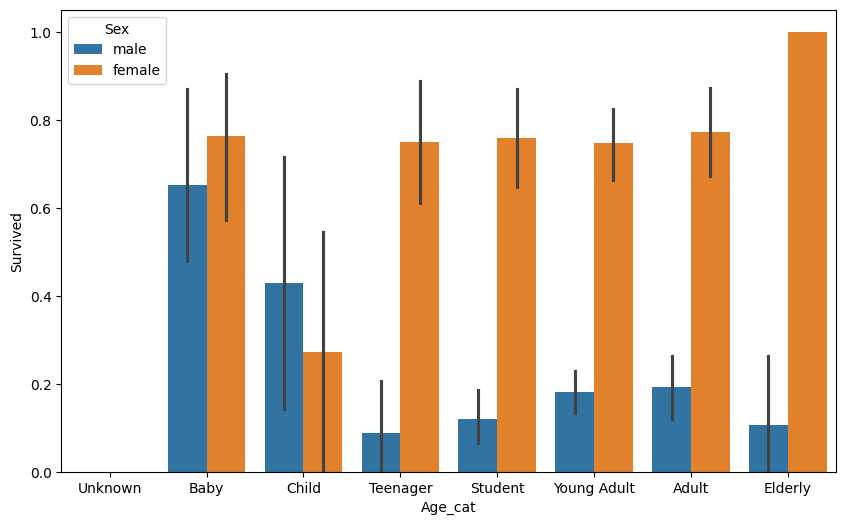

In [37]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용
def get_category(age):
  cat = ''
  if age <= -1: cat = 'Unknown'
  elif age <= 5: cat = 'Baby'
  elif age <= 12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <= 35: cat = 'Young Adult'
  elif age <= 60: cat = 'Adult'
  else: cat = 'Elderly'

  return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
df['Age_cat'] = df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=df, order=group_names)
df.drop('Age_cat', axis=1, inplace=True)

In [38]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

df = encode_features(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [39]:
# Null처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df
# 원본 데이터를 재로딩, 피처 데이터 세트와 레이블 데이터 세트 추출
df = pd.read_csv(file_path)
y_df = df['Survived']
X_df = df.drop('Survived', axis=1)

X_df = transform_features(X_df)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=11)



<ipython-input-39-a55e6d6644a9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-39-a55e6d6644a9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [41]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8659


In [42]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  # 폴드 세트가 5인 KFold 객체 생성, 폴드 세트별 정확도를 담을 리스트 객체 생성
  kfold = KFold(n_splits=folds)
  scores = []
  # KFold 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_df)):
    # X_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_df.values[train_index], X_df.values[test_index]
    y_train, y_test = y_df.values[train_index], y_df.values[test_index]
    # Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))

  # 5개 fold에서의 평균 정확도 계산
  mean_score = np.mean(scores)
  print('평균 정확도 : {0:.4f}'.format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7823


In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_df, y_df, cv=5)
print('교차 검증별 정확도 : ', np.round(scores, 4))
print('평균 검증 정확도 : ', np.round(np.mean(scores), 4))


교차 검증별 정확도 :  [0.743  0.7753 0.7921 0.7865 0.8427]
평균 검증 정확도 :  0.7879


In [44]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2, 3, 5, 10],
              'min_samples_split' : [2, 3, 5],
              'min_samples_leaf' : [1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator
pred = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('테스트 데이터 세트 정확도 : {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 데이터 세트 정확도 : 0.8715
